<a href="https://colab.research.google.com/github/ToonMath/Bachelor_Master_projects/blob/main/Scientific_computing_Wave_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

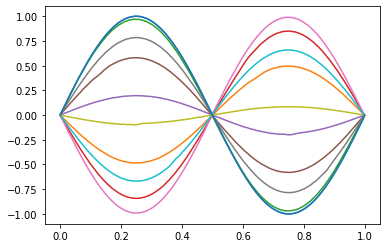

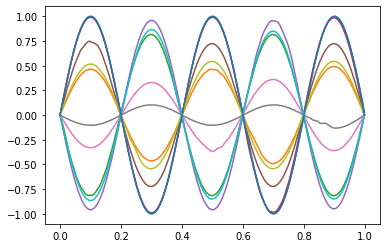

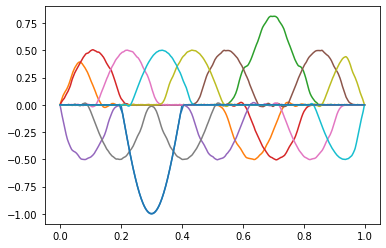

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def evaluate(psi, c, L, N, t_end, dt):
    """Evualuates a given function psi"""
    dx = L/N
    t_values = np.arange(0, t_end, dt)
    x_values = np.arange(0, L, L/N) # create array from x0 to L with step size L/N

    t_steps = len(t_values)
    x_steps = len(x_values)
    constant = (c*dt/dx)**2

    #loop over t values, but ignore first two steps because they are aready given
    for _ in range(t_steps):
        values = [0] # first value is always zero due to the boundary condition

        # loop over discreted x values, but ignore boundaries
        for i in range(1,x_steps-1):
            new = constant*(psi[-1,i+1]+psi[-1,i-1]-2*psi[-1,i])-psi[-2,i] + 2*psi[-1, i]
            values.append(new)
        
        values.append(0)
        psi = np.vstack([psi, values])
    return psi


# define constants
c = 1 # wave constant
L = 1 
N = 500
t_end = 2*np.pi
dt = 0.001

# psi'(0) = 0. So initialize wave with the same value for the first to steps
x_values = np.arange(0, L, L/N)
t_values = np.arange(0, t_end, dt)
t_steps = len(t_values)

# b) i:
psi_0 = [np.sin(2*np.pi*x) for x in x_values]
psi = np.array([psi_0, psi_0])
psi = evaluate(psi, c, L, N, t_end, dt)
for i in range(0,t_steps,round(t_steps/10)):
    plt.plot(x_values, psi[-i])
plt.show()
# b) ii:
psi_0 = [np.sin(5*np.pi*x) for x in x_values]
psi = np.array([psi_0, psi_0])
psi = evaluate(psi, c, L, N, t_end, dt)
for i in range(0,t_steps,round(t_steps/10)):
    plt.plot(x_values, psi[-i])
plt.show()
# b) iii:
psi_0 = [np.sin(5*np.pi*x) if x < 2/5 and x > 1/5 else 0 for x in x_values]
psi = np.array([psi_0, psi_0])
psi = evaluate(psi, c, L, N, t_end, dt)
for i in range(0,t_steps,round(t_steps/10)):
    plt.plot(x_values, psi[-i])



6286


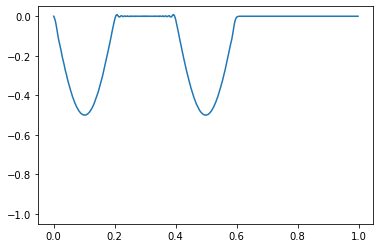

In [ ]:

"""
A simple example of an animated plot
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots()

line, = ax.plot(x_values, psi[0])


def animate(i):
    line.set_ydata(psi[i])  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x_values, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 6286), init_func=init,
                              interval=25, blit=True)
HTML(ani.to_html5_video())


0.25


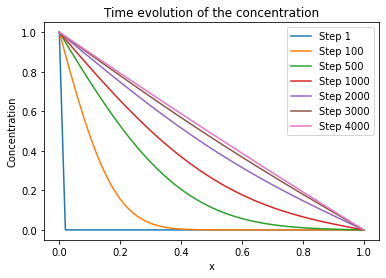

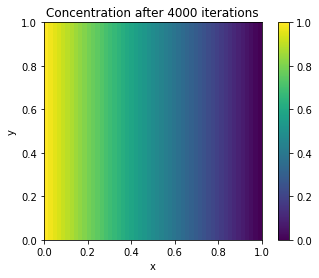

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

D = 1
N = 51
dl = 1 / (N - 1) # interval size of both x and y axis
dt = 0.0001

grid = np.zeros((N, N))
grid[:,0] = 1

c = dt*D/(dl**2)
print(c)
ax, fig = plt.subplots()
x = np.arange(0, 1 + dl, dl)


for i in range(4000):

    if i+1 in [1, 100, 500, 1000, 2000, 3000,4000]:
        x = np.arange(0, 1 + dl, dl)
        fig.plot(x, grid[0,:], label="Step {}".format(i+1))
    newgrid = np.zeros((N, N))
    newgrid[:,0] = 1

    # loop over grid excluding boundaries
    for i in range(1, N -1):
        for j in range(1, N - 1):
            newgrid[i,j] = grid[i,j] + c*(grid[i+1,j] + grid[i-1,j]+grid[i,j+1] + grid[i,j-1] - 4*grid[i,j])
    # loop over boundaries
    for j in range(1, N - 1):
        newgrid[0,j] = grid[0,j] + c*(grid[1,j] + grid[-1,j]+grid[0,j+1] + grid[0,j-1] - 4*grid[i,j])
        newgrid[-1,j] = grid[-1,j] + c*(grid[0,j] + grid[-2,j]+grid[-1,j+1] + grid[-1,j-1] - 4*grid[-1,j])

    grid = newgrid  
plt.legend()  
plt.title("Time evolution of the concentration")
plt.xlabel("x")
plt.ylabel("Concentration")
plt.show()
plt.imshow(grid, extent=[0,1,0,1])
plt.title("Concentration after 4000 iterations")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()



2210


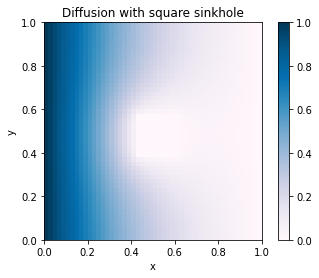

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

D = 1
N = 50
dl = 1 / (N - 1) # interval size of both x and y axis
dt = 0.00001

grid = np.zeros((N, N))
grid[:,0] = 1

object = {}
for x in range(21, 31):
    for y in range(21, 31):
        object[(x, y)] = 0


stopcondition = 10**-5
counter = 0
maxdiff = np.inf
while(maxdiff >= stopcondition):
    newgrid = np.zeros((N, N))
    newgrid[:,0] = 1
    maxdiff = 0

    # loop over grid excluding boundaries
    for i in range(1, N -1):
        for j in range(1, N - 1):

            if (i, j) in object:
                newgrid[i, j] = object[(i, j)]
                continue
            
            newgrid[i,j] = 1/4*(grid[i+1,j] + grid[i-1,j]+grid[i,j+1] + grid[i,j-1])
            diff = np.abs(newgrid[i, j] - grid[i, j])
            if diff > maxdiff:
                maxdiff = diff
            
    # loop over boundaries
    for j in range(1, N - 1):
        newgrid[0,j] = 1/4*(grid[1,j] + grid[-1,j]+grid[0,j+1] + grid[0,j-1])
        newgrid[-1,j] = 1/4*(grid[0,j] + grid[-2,j]+grid[-1,j+1] + grid[-1,j-1])

        diff = np.abs(newgrid[i, j] - grid[i, j])
        if diff > maxdiff:
            maxdiff = diff
            
    grid = newgrid  
    counter += 1

print(counter)
plt.show()  
color_map = plt.cm.get_cmap('PuBu')
plt.imshow(grid, cmap=color_map,extent=[0,1,0,1])
plt.title("Diffusion with square sinkhole")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()


2349


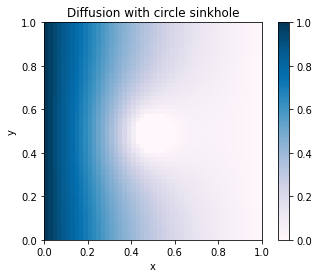

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

D = 1
N = 50
dl = 1 / (N - 1) # interval size of both x and y axis
dt = 0.00001

grid = np.zeros((N, N))
grid[:,0] = 1

object = {}
center = (25, 25)
radius = 5
for x in range(21, 31):
    for y in range(21, 31):
        if ((x-center[0])**2 + (y-center[1])**2)**0.5 < radius:
            object[(x, y)] = 0


stopcondition = 10**-5
counter = 0
maxdiff = np.inf
while(maxdiff >= stopcondition):
    newgrid = np.zeros((N, N))
    newgrid[:,0] = 1
    maxdiff = 0

    # loop over grid excluding boundaries
    for i in range(1, N -1):
        for j in range(1, N - 1):

            if (i, j) in object:
                newgrid[i, j] = object[(i, j)]
                continue
            
            newgrid[i,j] = 1/4*(grid[i+1,j] + grid[i-1,j]+grid[i,j+1] + grid[i,j-1])
            diff = np.abs(newgrid[i, j] - grid[i, j])
            if diff > maxdiff:
                maxdiff = diff
            
    # loop over boundaries
    for j in range(1, N - 1):
        newgrid[0,j] = 1/4*(grid[1,j] + grid[-1,j]+grid[0,j+1] + grid[0,j-1])
        newgrid[-1,j] = 1/4*(grid[0,j] + grid[-2,j]+grid[-1,j+1] + grid[-1,j-1])

        diff = np.abs(newgrid[i, j] - grid[i, j])
        if diff > maxdiff:
            maxdiff = diff
            
    grid = newgrid  
    counter += 1

print(counter)
plt.show()  
color_map = plt.cm.get_cmap('PuBu')
plt.imshow(grid, cmap=color_map, extent=[0,1,0,1])
plt.title("Diffusion with circle sinkhole")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

D1 = 1
D2 = 0.1
N = 51
dl = 1 / (N - 1) # interval size of both x and y axis
dt = 0.0001

grid = np.zeros((N, N))
grid[:,0] = 1

c1 = dt*D1/(dl**2)
c2 = dt*D2/(dl**2)

print(c1, c2)
object = {}
center = (25, 25)
radius = 5
for x in range(21, 31):
    for y in range(21, 31):
        if ((x-center[0])**2 + (y-center[1])**2)**0.5 < radius:
            object[(x, y)] = 0

ax, fig = plt.subplots()
x = np.arange(0, 1 + dl, dl)


for i in range(4000):

    newgrid = np.zeros((N, N))
    newgrid[:,0] = 1

    # loop over grid excluding boundaries
    for i in range(1, N -1):
        for j in range(1, N - 1):
            if (i, j) in object:
                newgrid[i,j] = grid[i,j] + c2*(grid[i+1,j] + grid[i-1,j]+grid[i,j+1] + grid[i,j-1] - 4*grid[i,j])
            else: 
                newgrid[i,j] = grid[i,j] + c1*(grid[i+1,j] + grid[i-1,j]+grid[i,j+1] + grid[i,j-1] - 4*grid[i,j])
    # loop over boundaries
    for j in range(1, N - 1):
        newgrid[0,j] = grid[0,j] + c1*(grid[1,j] + grid[-1,j]+grid[0,j+1] + grid[0,j-1] - 4*grid[i,j])
        newgrid[-1,j] = grid[-1,j] + c1*(grid[0,j] + grid[-2,j]+grid[-1,j+1] + grid[-1,j-1] - 4*grid[-1,j])

    grid = newgrid

plt.show()
plt.imshow(grid, extent=[0,1,0,1])
plt.title("Concentration after 4000 iterations")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()



TypeError: ignored